# 1. Neural networks

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import mglearn
%matplotlib inline

Text(0, 0.5, 'Feature 1')

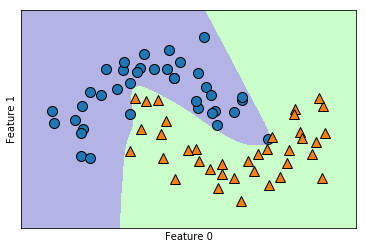

In [3]:
import matplotlib.pyplot as plt
X, y = make_moons(n_samples=100, noise=0.25, random_state=0)
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0)
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10]).fit(X_train, y_train)
mglearn.plots.plot_2d_classification(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


# 2. Linear SVM

C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

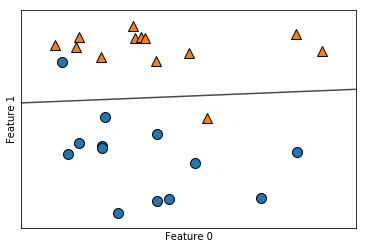

In [4]:
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, fill=False, eps=0.5, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

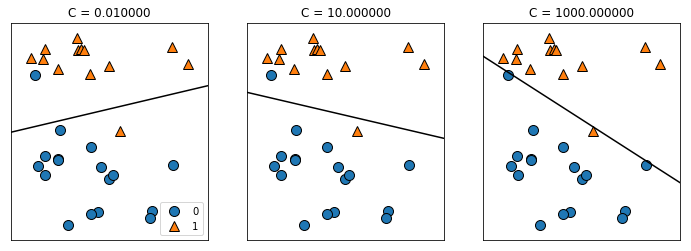

In [5]:
mglearn.plots.plot_linear_svc_regularization()

# 3. Kernel SVM

In [6]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set:", svc.score(X_train, y_train))
print("Accuracy on test set:", svc.score(X_test, y_test))

Accuracy on training set: 1.0
Accuracy on test set: 0.6293706293706294


C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set:", svc.score(X_train_scaled, y_train))
print("Accuracy on test set:", svc.score(X_test_scaled, y_test))

Accuracy on training set: 0.9483568075117371
Accuracy on test set: 0.951048951048951


C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [8]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set:", svc.score(X_train_scaled, y_train))
print("Accuracy on test set:", svc.score(X_test_scaled, y_test))

Accuracy on training set: 0.9882629107981221
Accuracy on test set: 0.972027972027972


C:\Users\rraj2\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# 4. Multiclass classification 

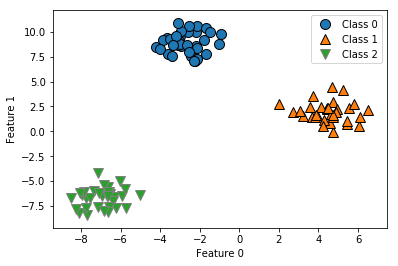

In [9]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [10]:
svm = LinearSVC().fit(X, y)
print("Coefficient shape:", svm.coef_.shape)
print("Intercept shape:", svm.intercept_.shape)

Coefficient shape: (3, 2)
Intercept shape: (3,)


In [11]:
import numpy as np

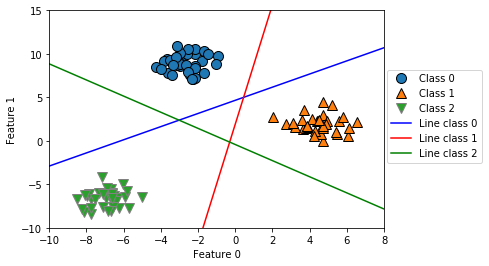

In [12]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(svm.coef_, svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

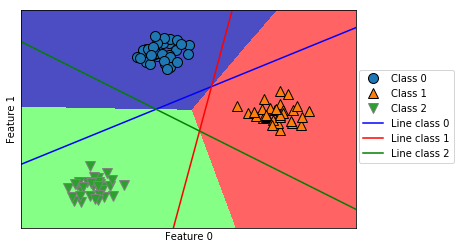

In [13]:
mglearn.plots.plot_2d_classification(svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(svm.coef_, svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1', 'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# 5. Exercises

Question 1

In [14]:
svm.coef_

array([[-0.1749251 ,  0.23141321],
       [ 0.47621178, -0.06937555],
       [-0.18914234, -0.20399657]])

The first two lines (blue and red) have a positive slope, i.e., their equation is w[0]x[0] + w[1]x[1] = b.  The slope of the third line is negative.

Question 2

In [15]:
help(zip)

Help on class zip in module builtins:

class zip(object)
 |  zip(iter1 [,iter2 [...]]) --> zip object
 |  
 |  Return a zip object whose .__next__() method returns a tuple where
 |  the i-th element comes from the i-th iterable argument.  The .__next__()
 |  method continues until the shortest iterable in the argument sequence
 |  is exhausted and then it raises StopIteration.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.



The function takes in iterables as arguments here svm.coef_ & svm.intercept_ and returns an iterator which is coef intercep. This iterator generates a series of tuples containing elements from each iterable.

Question 3

This formula means that we are drawing the line x[1] = -(x[0] w[0] + b) / w[1]. It is just a varient of standard equation of a straight line w[0]x[0] + w[1]x[1] = b